<a href="https://colab.research.google.com/github/bianca-isaac/Repositorio/blob/main/PT_An%C3%A1lise_de_dados_de_Toronto_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados de Toronto - Canadá usando Pandas e dos Dados do Airbnb.

Todo bom negocio nasce de um problema que precisamos resolver. E foi o que aconteceu com o  [Airbnb](https://www.airbnb.com.br/). A ideia surgiu em 2008 quando dois designers hospedarem viajantes que procuravam local para ficar em um espaço sobrando. 
De acordo com seu site hoje contam com 4 milhões de anfitriões que já receberam mais de 800 milhões de chegadas de hóspedes em cerca de 100 mil cidades em quase todos os países e regiões do mundo.

Através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), a Airbnb disponibiliza dados de algumas das principais cidades do mundo. 
Com a grande quantidade de dados existentes no portal é possível desenvolver projetos de *Data Science*. 


**O objetivo deste *notebook* é realizar uma análise exploratória dos dados referentes à cidade de Toronto no Canada, e ver quais insights podem ser extraídos a partir de dados brutos.**

Este *notebook* foi realizado como um dos projetos que fazem parte das aulas do curso Data Science na Prática do [*Sigmoidal*](https://sigmoidal.ai/).



Artigo no Medium

## Obtenção dos Dados

Os dados foram obtidos através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) 

Esta será uma análise exploratória inicial do dados. 
Arquivo utilizado: 


*   [listings.csv](http://data.insideairbnb.com/canada/on/toronto/2021-01-02/visualisations/listings.csv) - Summary information and metrics for listings in Toronto (good for visualisations).





In [3]:
# importação dos pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2021-01-02/visualisations/listings.csv")

In [5]:
# Verificar a estrutura
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.11,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,96,180,169,2013-08-27,1.22,2,365
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,64,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,70,1,217,2019-12-22,1.68,2,324
4,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,Greenwood-Coxwell,43.66890,-79.32592,Entire home/apt,45,365,26,2011-08-30,0.20,1,0


## Análise dos Dados


A etapa inicial de análise de dados é a mais importante em qualquer projeto. 

É necessário analisarmos os atributos e suas características como: 
* tipo
* Presença de ouliers
* Identificar o % de dados faltantes

Muitas vezes com uma análise exploratória bem feita conseguimos responder perguntas e hipóteses iniciais. 

In [6]:
# Nomes colunas
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Dicionário das variáveis**

* *id* - número de identificação específico para o imóvel 
* *name* - nome do imóvel 
* *host_id* - número de identificação específico do anfitrião
* *host_name* - nome do anfitrião
* *neighbourhood_group* - não possui dados válidos
* *neighbourhood* - bairro
* *latitude* - coordenada de latitude do imóvel
* *longitude* - coordenada de longitude do imóvel
* *room_type* - casa inteira/somente quarto
* *price* - preço aluguel
* *minimum_nights* - mínimo de noites para reservar 
* *number_of_reviews* - número de reviews do imóvel
* *last_review* - data último review
* *reviews_per_month* - quantidade de reviews por mês
* *calculated_host_listings_count* - número de imóveis por anfitrião
* *availability_365* -  disponibilidade dentro de 365 dias



In [7]:
# mostrar as 5 últimas entradas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18260,47376260,"Private Ensuite room, Comfy Guest House, Toronto",138145,Comfy Guest House,NaN,Moss Park,43.66206,-79.36938,Private room,79,2,0,NaN,NaN,1,245
18261,47376858,Modern Nice and Cozy 3Bedroom House in Scarbor...,61575224,Sean,NaN,Woburn,43.77640,-79.22799,Entire home/apt,222,1,0,NaN,NaN,4,364
18262,47377779,Private Bedroom Downtown Toronto,317648405,Dan,NaN,Dovercourt-Wallace Emerson-Junction,43.67071,-79.42656,Private room,31,1,0,NaN,NaN,2,103
18263,47389938,"2 Bedrooms, 1 Bathroom YONGE & SHEPPARD - YS25FL1",12742095,Emil & Sue,NaN,Willowdale East,43.76257,-79.41037,Entire home/apt,115,28,0,NaN,NaN,29,334
18264,47390017,"Lakeview Condo, CN Tower, Free Parking, Mthly ...",91170750,Yawen,NaN,Waterfront Communities-The Island,43.63958,-79.39742,Entire home/apt,55,28,0,NaN,NaN,1,31


### **Quantos atributos e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Analisar o tipo das variáveis é importante para podermos saber como trabalhar com os dados e identificar se faz sentido o tipo da variável para a análise que pretendemos fazer. 
* Tipo (numérica, categórica, float, int, etc)

In [8]:
# mostra volume de dados 
# linhas
print("Linhas:\t {}".format(df.shape[0]))
#colunas
print("Variáveis:\t{}\n".format(df.shape[1]))


Linhas:	 18265
Variáveis:	16



In [9]:
# Verifica tipo das variáveis
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [40]:
# valores únicos
print("\nVALORES ÚNICOS:")
print(df.nunique().sort_values())


VALORES ÚNICOS:
neighbourhood_group                   0
room_type                             4
calculated_host_listings_count       39
minimum_nights                      103
neighbourhood                       140
availability_365                    365
number_of_reviews                   379
price                               582
reviews_per_month                   773
last_review                        1690
host_name                          5374
latitude                           8987
longitude                         11220
host_id                           12020
name                              17823
id                                18265
dtype: int64


### **Qual a porcentagem de valores ausentes no *dataset*?**

Ao identificar a quantidade de dados ausentes podemos verificar a qualidade do *dataset*. 

In [10]:
# Identifica a quantidade de dados faltantes nas variáveis
# True - temm dados faltantes = 1
# False - não tem dados faltantes = 0
df.isnull().sum()

id                                    0
name                                  1
host_id                               0
host_name                            11
neighbourhood_group               18265
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        4105
reviews_per_month                  4105
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# Identifica a quantidade de dados ausentes nas variáveis por percentual e em ordem decrescende de valor ausente
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.224747
last_review                       0.224747
host_name                         0.000602
name                              0.000055
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Para este *dataset*:
* A coluna *neighbourhood_group* possui 100% dos seus valores faltantes
* As colunas *reviews_per_month* e *last_review* aproximadamente 22 % de valores nulos cada

### **Tipo de distribuição das variáveis** 

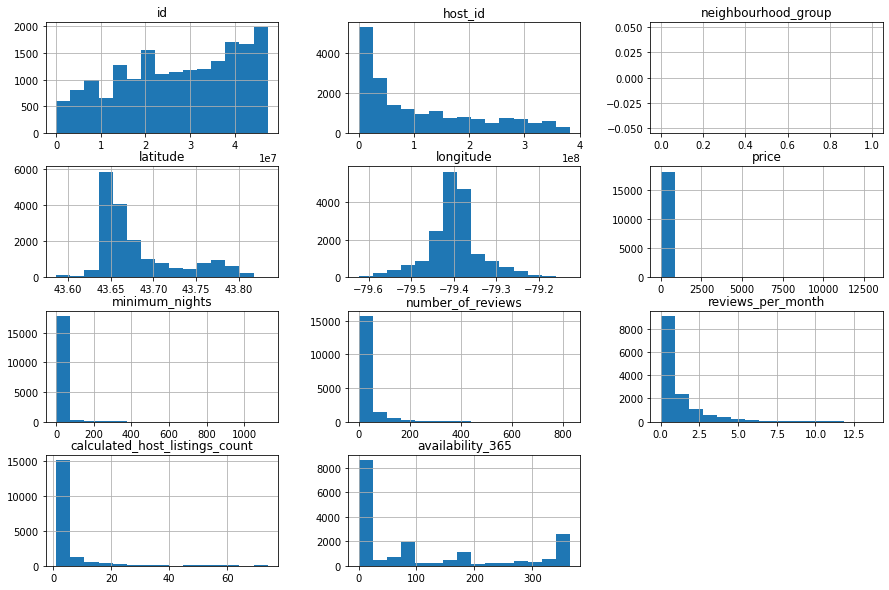

In [12]:
# histograma das variáveis numéricas
# ao colocar  o ; no final não mostra texto inicial
df.hist(bins=15, figsize=(15,10));


Ao analisar as distribuições por histograma podemos verificar que existem *outliers*. 

### Confirmando a existência de *outliers*

Podemos confirmar a existência de *outliers* através do resumo estatístico dos dados e/ou *boxplots* para as variáveis

In [13]:
# resumo estatístico 
df[['price', 'minimum_nights' , 'number_of_reviews' , 'reviews_per_month' , 'calculated_host_listings_count' , 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,18265.000000,18265.000000,18265.000000,14160.000000,18265.000000,18265.000000
mean,137.659677,13.482617,26.021243,1.095512,4.718478,111.429565
std,306.423241,38.038305,53.033309,1.496456,9.629260,136.522538
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.000000,1.000000,1.000000,0.170000,1.000000,0.000000
50%,95.000000,2.000000,5.000000,0.510000,1.000000,52.000000
75%,149.000000,20.000000,26.000000,1.380000,3.000000,180.000000
max,13000.000000,1125.000000,828.000000,13.660000,74.000000,365.000000


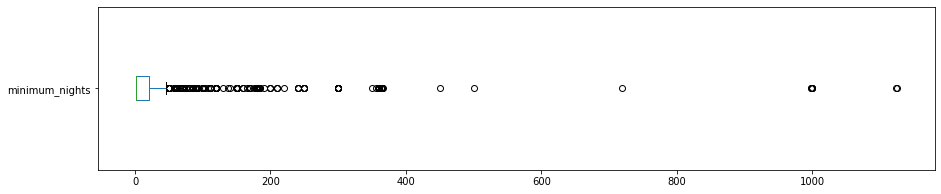

minimum_nights:valores acima de 30:
704 entradas
3.8544%


In [14]:
# gráfico bloxplot minimun_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights:valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights >30])/df.shape[0])*100))

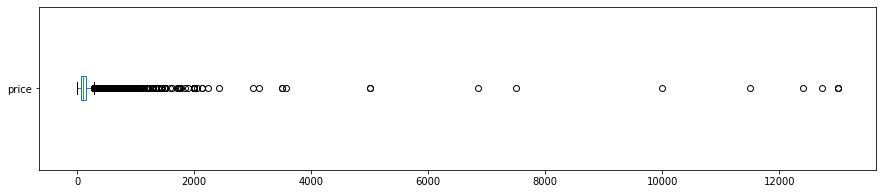

price:valores acima de 1500:
74 entradas
0.4051%


In [15]:
# gráfico bloxplot price

df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Quantidade de valores acima de 1500 para price
print("price:valores acima de 1500:")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price >1500])/df.shape[0])*100))

### **Removendo *outliers***

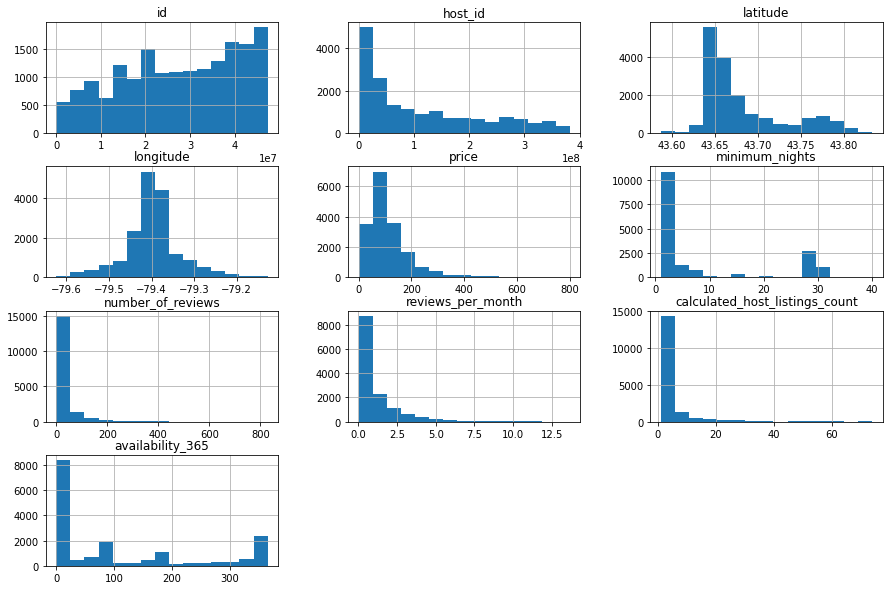

In [16]:
# remove outlier e criar um novo dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 800].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 40].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 20].index, axis=0, inplace=True)

# remove neighbourhood_group pois não tem dados
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plotar histograma 
df_clean.hist(bins=15, figsize=(15,10));

### **Médias**

In [39]:
# ver a média da coluna `price``
df_clean.mean()


id                                2.738076e+07
host_id                           1.134113e+08
latitude                          4.368141e+01
longitude                        -7.939737e+01
price                             1.181565e+02
minimum_nights                    8.523165e+00
number_of_reviews                 2.642322e+01
reviews_per_month                 1.109007e+00
calculated_host_listings_count    4.817775e+00
availability_365                  1.083575e+02
dtype: float64

### **Qual a correlação existente entre as variáveis**

Correlação nos mostra a relação entre duas variáveis.
Podemos medir a correlação através do coeficiente de correlação.

O índice de correlação varia entre -1 e 1 onde 1 representa uma correlação perfeita e -1 uma anticorrelação perfeita

In [18]:
# cria uma matriz de correlação
corr = df_clean[['price','minimum_nights', 'calculated_host_listings_count', 'reviews_per_month']].corr()

display(corr)

,price,minimum_nights,calculated_host_listings_count,reviews_per_month
price,1.000000,-0.046258,-0.011225,-0.023538
minimum_nights,-0.046258,1.000000,0.108050,-0.030938
calculated_host_listings_count,-0.011225,0.108050,1.000000,-0.017276
reviews_per_month,-0.023538,-0.030938,-0.017276,1.000000


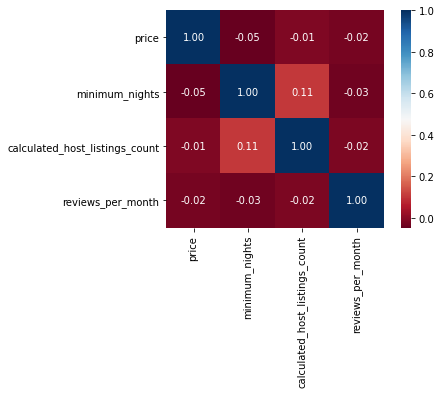

In [19]:
# Mapa de calor
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Qual o tipo de imóvel mais alugado no Airbnb?**

In [20]:
# mostra a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    10881
Private room        6196
Shared room          305
Hotel room            58
Name: room_type, dtype: int64

In [21]:
# mostra a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.623911
Private room       0.355275
Shared room        0.017489
Hotel room         0.003326
Name: room_type, dtype: float64

### **Qual bairro mais alugado no Airbnb?**

In [22]:
# mostra a quantidade de cada bairro disponível
df_clean.neighbourhood.value_counts()

Waterfront Communities-The Island    3014
Niagara                               710
Church-Yonge Corridor                 575
Annex                                 555
Kensington-Chinatown                  499
                                     ... 
Beechborough-Greenbrook                12
Humbermede                             11
Kingsway South                         11
Thistletown-Beaumond Heights           10
Rustic                                  6
Name: neighbourhood, Length: 140, dtype: int64

In [23]:
# mostra o percentual de cada bairro disponível
df_clean.neighbourhood.value_counts() / df_clean.shape[0]

Waterfront Communities-The Island    0.172821
Niagara                              0.040711
Church-Yonge Corridor                0.032970
Annex                                0.031823
Kensington-Chinatown                 0.028612
                                       ...   
Beechborough-Greenbrook              0.000688
Humbermede                           0.000631
Kingsway South                       0.000631
Thistletown-Beaumond Heights         0.000573
Rustic                               0.000344
Name: neighbourhood, Length: 140, dtype: float64

### **Qual a localidade mais cara do dataset?**



Para compararmos variáveis podemos utilizar a função `groupby()`.
Para este exemplo vamo comparar os bairros de acordo com seu preço de localização. 

In [24]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lawrence Park South                  162.409091
Etobicoke West Mall                  161.645161
Waterfront Communities-The Island    160.454214
Leaside-Bennington                   157.023810
The Beaches                          152.673469
Markland Wood                        150.461538
South Riverdale                      149.911043
Rosedale-Moore Park                  149.188679
Niagara                              145.345070
Cabbagetown-South St.James Town      143.610256
Name: price, dtype: float64

### **Imóveis por latitude e longitude**

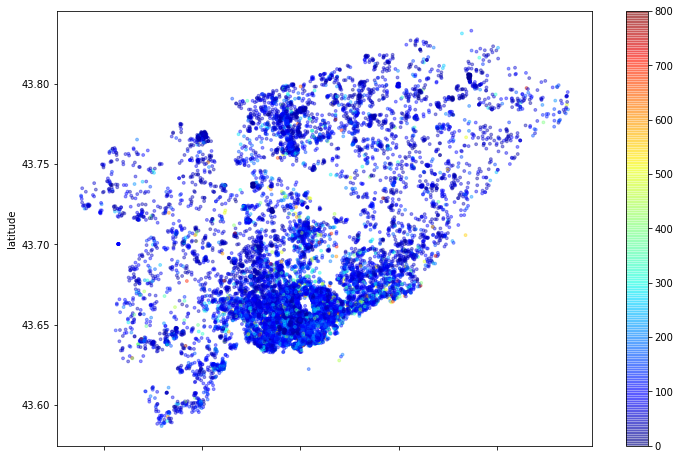

In [26]:
# Mostra gráfico onde X=longitude e y=latitude com os preços
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## Resumo


Foi feita apenas uma análise exploratória inicial na base de dados do Airbnb.
Vimos que existem algumas variáveis com dados faltantes e outras com outliers. 

Em algumas localidades há poucos imóveis disponíveis, o que contribui para distorcer as informações estatísticas de algumas variáveis. 
Nas variáveis price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365 identificamos a existencia de ouliters.
Removemos os outliers para podermos ter dados estatísticos mais apurados. 





## Conclusões

A **média de valor** de aluguel por 1 noite na cidade de Toronto é de 118,16 dólares canadenses. 

Os hóspedes ficam em **média 8 noites**.

**Não existe correlação considerável entre o preço, mínimo de noites, anfitrião e *reviews* por mês.**
Lembrando que correlação não implica em causalidade. 

Com aproximadamente 62% dos imóveis, o **tipo mais disponível** é o de imóvel completo, seguido por quarto privativo que conta com aproximadamente 35% dos tipos disponíveis. 

Segundo os dados os **5 bairros com mais imóveis disponíveis** são:  
* Waterfront Communities-The Island
* Niagara
* Church-Yonge Corridor
* Annex 
* Kensington-Chinatown

Por não morar em Toronto pesquisei os bairros no *Google* para verificar a veracidade das informações do *dataset*. 
E de acordo com minha pesquisa, esses bairros realmente mais populares para viajantes. 


---





Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos. 